<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/Workshop_Solution_AI_partie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pandas numpy matplotlib seaborn plotly

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [9]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())

Saving cars.csv to cars (3).csv
   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

    price  
0  120000  
1  550000  


In [18]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
print("=== Step 1: Dataset Loaded ===")
print("Data Types:", df.dtypes)
print("Shape:", df.shape)

=== Step 1: Dataset Loaded ===
Data Types: Unnamed: 0              int64
car_name               object
brand                  object
model                  object
vehicle_age             int64
km_driven               int64
seller_type            object
fuel_type            category
transmission_type      object
mileage               float64
engine                  int64
max_power             float64
seats                   int64
price                   int64
dtype: object
Shape: (15411, 14)


In [19]:
# -----------------------------
# Step 2: Data Handling & Matplotlib/Seaborn Visualizations
# -----------------------------
print("=== Step 2: Data Handling & Matplotlib/Seaborn Visualizations ===")
# Clean missing values and ensure correct types
df.dropna(inplace=True)
df['fuel_type'] = df['fuel_type'].astype('category')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

=== Step 2: Data Handling & Matplotlib/Seaborn Visualizations ===


In [17]:
# Aggregate mean values by brand
brand_means = df.groupby('brand').mean(numeric_only=True)
print("\n=== Mean Values by Brand ===")
print(brand_means)


=== Mean Values by Brand ===
                 Unnamed: 0  vehicle_age     km_driven    mileage  \
brand                                                               
Audi           10481.260417     7.369792  58611.531250  16.135990   
BMW            10640.009112     6.619590  50934.384966  17.440182   
Bentley        10281.666667     9.333333  25500.000000   8.033333   
Datsun          8764.058824     4.117647  33003.576471  21.215647   
Ferrari         4845.000000     2.000000   3800.000000   4.000000   
Force          17068.000000     5.000000  60000.000000  17.000000   
Ford            9850.230380     5.927848  58088.222785  19.922620   
Honda          10222.248485     6.263973  53499.156229  19.908795   
Hyundai         9896.910463     6.119048  50268.915493  19.588776   
ISUZU          11636.000000     4.000000  56014.500000  13.800000   
Isuzu           9129.375000     3.750000  76141.500000  12.575000   
Jaguar          9791.864407     6.372881  44219.457627  16.089831   
Jeep

In [20]:
# Compute correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
print("\n=== Correlation Matrix ===")
print(corr)


=== Correlation Matrix ===
             Unnamed: 0  vehicle_age  km_driven   mileage    engine  \
Unnamed: 0     1.000000    -0.006250  -0.003778 -0.014699  0.012972   
vehicle_age   -0.006250     1.000000   0.333891 -0.257394  0.098965   
km_driven     -0.003778     0.333891   1.000000 -0.105239  0.192885   
mileage       -0.014699    -0.257394  -0.105239  1.000000 -0.632987   
engine         0.012972     0.098965   0.192885 -0.632987  1.000000   
max_power      0.039367     0.005208   0.044421 -0.533128  0.807368   
seats         -0.031832     0.030791   0.192830 -0.440280  0.551236   
price          0.030523    -0.241851  -0.080030 -0.305549  0.585844   

             max_power     seats     price  
Unnamed: 0    0.039367 -0.031832  0.030523  
vehicle_age   0.005208  0.030791 -0.241851  
km_driven     0.044421  0.192830 -0.080030  
mileage      -0.533128 -0.440280 -0.305549  
engine        0.807368  0.551236  0.585844  
max_power     1.000000  0.172257  0.750236  
seats         0.1

In [22]:
# -----------------------------
# Matplotlib & Seaborn Figures
# -----------------------------
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Frequency')

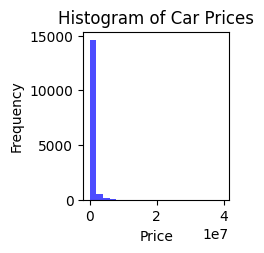

In [23]:
# 1. Histogram of Car Prices
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box Plot of Max Power')

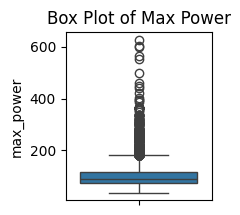

In [24]:
# 2. Boxplot of Max Power
plt.subplot(2, 3, 2)
sns.boxplot(y=df['max_power'])
plt.title('Box Plot of Max Power')

Text(0.5, 1.0, 'Scatter Plot: Price vs Max Power')

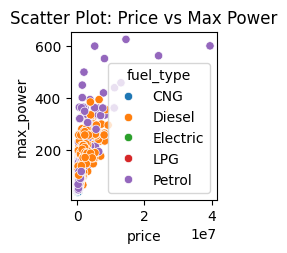

In [25]:
# 3. Scatter Plot: Price vs Max Power
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='price', y='max_power', hue='fuel_type')
plt.title('Scatter Plot: Price vs Max Power')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Datsun'),
  Text(4, 0, 'Ferrari'),
  Text(5, 0, 'Force'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Hyundai'),
  Text(9, 0, 'ISUZU'),
  Text(10, 0, 'Isuzu'),
  Text(11, 0, 'Jaguar'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Kia'),
  Text(14, 0, 'Land Rover'),
  Text(15, 0, 'Lexus'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Mahindra'),
  Text(18, 0, 'Maruti'),
  Text(19, 0, 'Maserati'),
  Text(20, 0, 'Mercedes-AMG'),
  Text(21, 0, 'Mercedes-Benz'),
  Text(22, 0, 'Mini'),
  Text(23, 0, 'Nissan'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Renault'),
  Text(26, 0, 'Rolls-Royce'),
  Text(27, 0, 'Skoda'),
  Text(28, 0, 'Tata'),
  Text(29, 0, 'Toyota'),
  Text(30, 0, 'Volkswagen'),
  Text(31, 0, 'Volvo')])

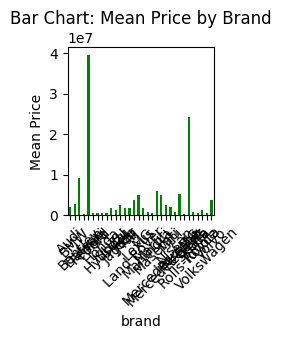

In [26]:
# 4. Bar Chart: Mean Price by Brand
plt.subplot(2, 3, 4)
brand_means['price'].plot(kind='bar', color='green')
plt.title('Bar Chart: Mean Price by Brand')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

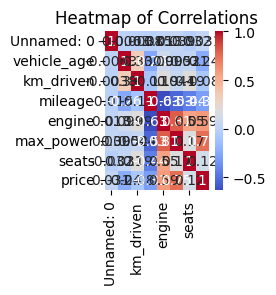

In [27]:
# 5. Heatmap of Correlations
plt.subplot(2, 3, 5)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')

plt.tight_layout()
plt.show()

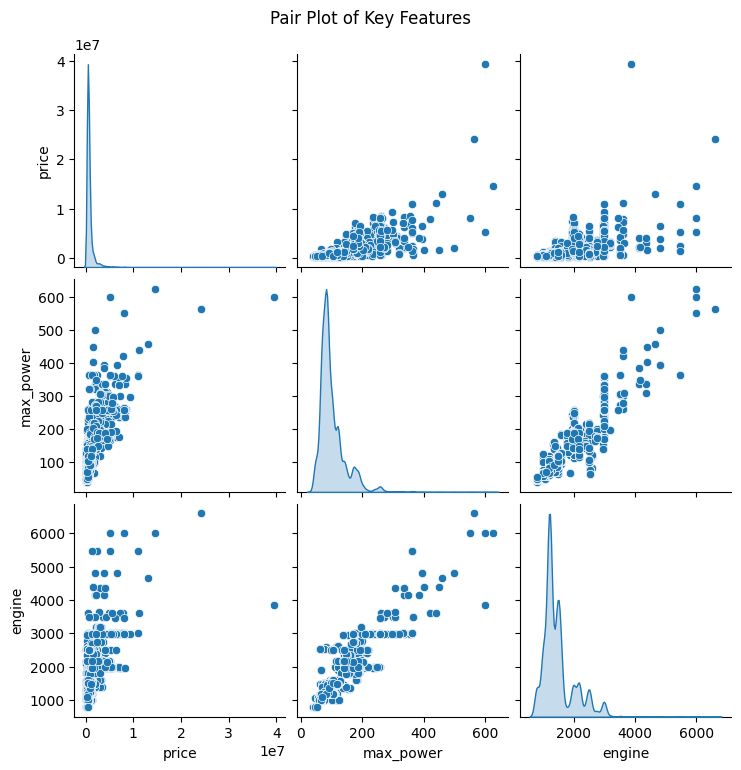

In [28]:
# 6. Pair Plot (separate figure)
sns.pairplot(df[['price', 'max_power', 'engine']].dropna(), diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

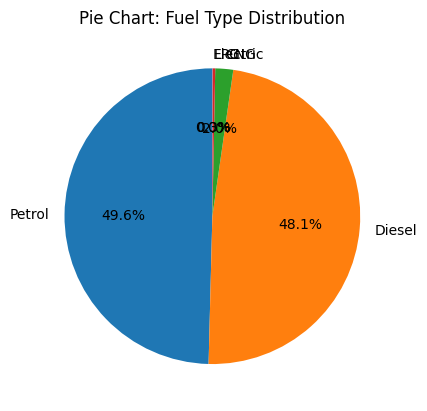

In [29]:
# Additional: Pie Chart for Fuel Type
plt.figure()
df['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Fuel Type Distribution')
plt.ylabel('')
plt.show()

In [30]:
print("=== Key Insights from Step 2 ===")
print("- Histograms reveal price distributions (e.g., skewed right).")
print("- Scatter plots show relationships (e.g., higher power correlates with higher price).")
print("- Heatmaps highlight correlations for ML feature selection (e.g., avoid multicollinearity).")



=== Key Insights from Step 2 ===
- Histograms reveal price distributions (e.g., skewed right).
- Scatter plots show relationships (e.g., higher power correlates with higher price).
- Heatmaps highlight correlations for ML feature selection (e.g., avoid multicollinearity).


In [31]:
# -----------------------------
# Step 3: Interactive Visualizations with Plotly
# -----------------------------
print("=== Step 3: Interactive Visualizations with Plotly ===")

=== Step 3: Interactive Visualizations with Plotly ===


In [32]:
# Scatter Plot (interactive)
fig1 = px.scatter(df, x='price', y='max_power', color='fuel_type',
                  title='Interactive Scatter Plot: Price vs Max Power')
fig1.show()

In [33]:
# 3D Scatter Plot
if 'engine' in df.columns:
    fig2 = px.scatter_3d(df, x='price', y='max_power', z='engine',
                         color='brand', title='3D Scatter Plot of Car Features')
    fig2.show()

In [34]:
# Box Plot
fig3 = px.box(df, y='price', color='fuel_type', title='Interactive Box Plot: Price by Fuel Type')
fig3.show()

In [35]:
# Interactive Heatmap
fig4 = px.imshow(corr, text_auto=True, color_continuous_scale='Viridis',
                 title='Interactive Heatmap of Correlations')
fig4.show()

In [36]:
# Pie Chart
fig5 = px.pie(df, names='fuel_type', title='Interactive Pie Chart: Fuel Type Distribution')
fig5.show()

In [37]:
# -----------------------------
# Insights Summary
# -----------------------------
print("=== Key Insights from Step 3 ===")
print("- Plotly's interactivity (e.g., hover for details) aids exploratory ML (e.g., outlier inspection).")
print("- Compare to Matplotlib: Plotly is better for presentations; Matplotlib for quick static plots.")


=== Key Insights from Step 3 ===
- Plotly's interactivity (e.g., hover for details) aids exploratory ML (e.g., outlier inspection).
- Compare to Matplotlib: Plotly is better for presentations; Matplotlib for quick static plots.
